In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
class StochasticProcess:
    def __init__(self, drift, volatility, delta_t, init_price, strike_price):
        self.drift = drift
        self.volatility = volatility
        self.delta_t = delta_t
        self.initial_price = init_price
        self.strike_price = strike_price
        self.current_price = init_price
        self.optimal_level = (2 * self.drift * self.strike_price) / (2 * self.drift + self.volatility ** 2)
        self.prices = [init_price]  # a list of the stock prices
        self.portfolio_values = []

    def time_step(self):
        # generate a price based on where we are
        optimal_put_price = 0
        dW_t = np.random.normal(0, math.sqrt(self.delta_t))  # the change in the brownian motion
        dS_t = self.drift * self.current_price * self.delta_t + self.volatility * self.current_price * dW_t  # new dS_t
        self.prices.append(self.current_price + dS_t)  # add it to our list of prices

        # price of the put
        if self.initial_price <= self.optimal_level:
            optimal_put_price = self.strike_price - self.initial_price
            d_optimal_put_price = -1
            return optimal_put_price
        else:
            optimal_put_price = (self.strike_price - self.optimal_level)*(self.current_price/self.optimal_level)**((-2*self.drift)/self.volatility**2)
            d_optimal_put_price = -((2*self.drift)/(self.current_price*self.volatility**2))*(self.strike_price - self.optimal_level)*(self.current_price/self.optimal_level)**((-2*self.drift)/self.volatility**2)
            
        # hedging portfolio
        C_t = self.drift*self.strike_price if self.current_price < self.optimal_level else 0
        dX_t = dS_t*d_optimal_put_price + self.delta_t*self.drift*(optimal_put_price - d_optimal_put_price*self.current_price)-self.delta_t* C_t

        self.portfolio_values.append(dX_t)
        self.current_price += dS_t  # update the current price
        return optimal_put_price


In [3]:
process = StochasticProcess(0.2, 0.3, 1/10000, 100, 120)
put_prices = []

In [4]:
time_to_expiry = 1
while time_to_expiry - process.delta_t > 0:
    put_prices.append(process.time_step())
    time_to_expiry -= process.delta_t

In [5]:
x1 = np.arange(0, len(process.prices))
x2 = np.arange(0, len(put_prices))
x3 = np.arange(0, len(process.portfolio_values))

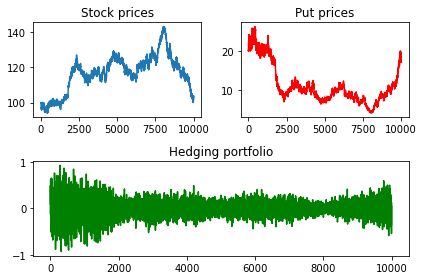

In [7]:
plot1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((2, 2), (0, 1), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2, 2), (1, 0), rowspan=2, colspan=2)
# Plot for stock prices
plot1.plot(x1, process.prices)
plot1.set_title('Stock prices')

# Plot for put prices
plot2.plot(x2, put_prices, color='r')
plot2.set_title('Put prices')

# Plot for hedging portfolio
plot3.plot(x3, process.portfolio_values, color='g')
plot3.set_title('Hedging portfolio')
  
# Packing all the plots and displaying them
plt.tight_layout() 

plt.show()